In [16]:
import re
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
pd.options.display.max_rows = 9999
from IPython.display import display
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as md
import pandas as pd
from datetime import datetime

import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
import statistics
import more_itertools as mit

In [7]:
def datetime_calculator(Date1,Date2):
    
    #"H:M:S - H:M:S"
    #Because the data has no minus sign like "-H:M;S", so we can do this.
    #But the calcluation will produce "-H:M:S" if Date1 < Date2
    #So normally there is no mistake.
    pattern1 = r"[0-9][0-9]:[0-9][0-9]:[0-9][0-9]"
    if re.match(pattern1, Date1) is not None and re.match(pattern1, Date2) is not None:
        d1_seconds = int(Date1[0:2]) * 3600 + int(Date1[3:5]) * 60 + int(Date1[6:8])
        d2_seconds = int(Date2[0:2]) * 3600 + int(Date2[3:5]) * 60 + int(Date2[6:8])
        interval = d1_seconds - d2_seconds
        sign = np.sign(interval)
        
        hour = str(abs(interval) //3600)
        minutes = str(abs(interval) %3600 // 60)
        seconds = str(abs(interval) - abs(int(hour)) * 3600 - abs(int(minutes)) * 60)
        
        
        if re.match(r"^[0-9]$",hour) is not None:
            hour = "0"+hour
        
        if sign == -1:
            hour = "-"+hour
            
        if re.match(r"^[0-9]$",minutes) is not None:
            minutes = "0"+minutes
        if re.match(r"^[0-9]$",seconds) is not None:
            seconds = "0"+seconds
            
            
        return hour + ":" + minutes + ":" + seconds

# Input

In [8]:
stop_times = pd.read_csv("Data/stop_times.csv")
stop_times.head()
stop_id = '5407F'
trip_id = '236896051'
stop_times = stop_times.loc[stop_times['stop_id'] == stop_id	].sort_values(by='arrival_time',ascending = True)
stop_times = stop_times[stop_times['trip_id'].astype(str).str.contains(trip_id)]
stop_times

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,pickup_type,drop_off_type
2032339,113150250236896051,05:21:00,05:21:00,5407F,5,0,0
2029861,113149944236896051,05:47:00,05:47:00,5407F,5,0,0
2035159,113150657236896051,05:58:00,05:58:00,5407F,5,0,0
2029775,113149935236896051,06:09:00,06:09:00,5407F,2,0,0
2029705,113149925236896051,06:11:00,06:11:00,5407F,5,0,0
2035190,113150665236896051,06:23:00,06:23:00,5407F,5,0,0
2029731,113149929236896051,06:37:00,06:37:00,5407F,5,0,0
2029781,113149936236896051,06:42:00,06:42:00,5407F,2,0,0
2029750,113149932236896051,06:46:00,06:46:00,5407F,5,0,0
2029769,113149934236896051,06:54:00,06:54:00,5407F,5,0,0


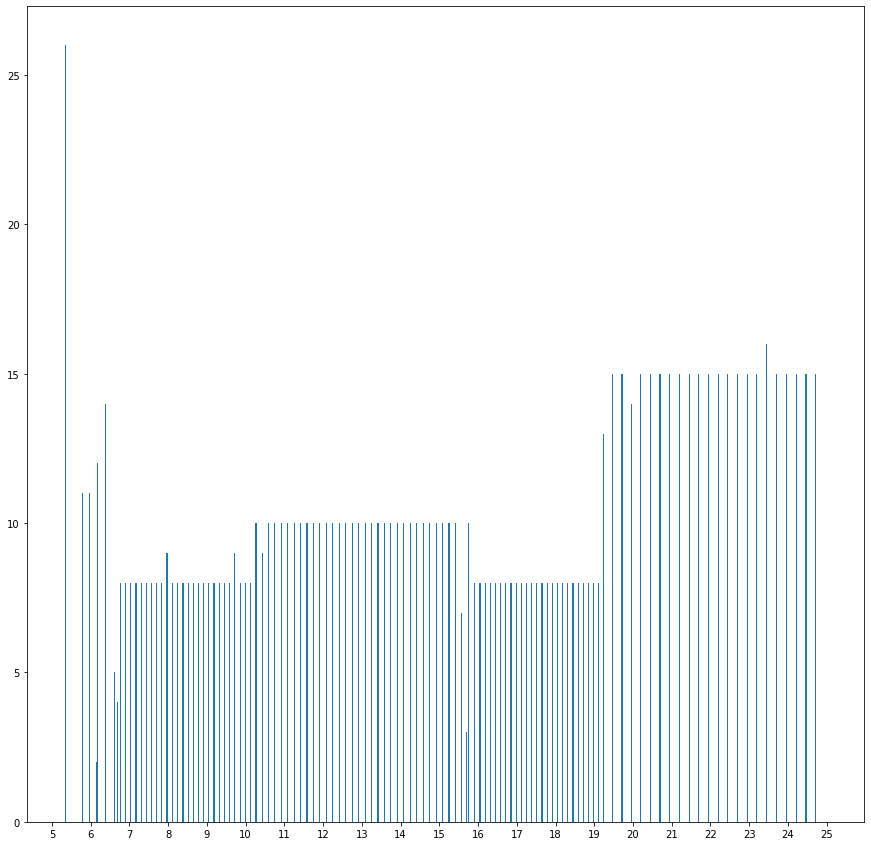

In [9]:
intervals_array = []

for i in range(len(stop_times['arrival_time'].values)):
    try:
        intervals_array.append(datetime_calculator(stop_times['arrival_time'].values[i+1],stop_times['arrival_time'].values[i]))
    except IndexError:
        intervals_array.append('00:00:00')

intervals_array = [float(intervals_array[i].split(':')[1]) for i in range(len(intervals_array))]
intervals_array

stop_times['intervals']=intervals_array

time_integer = float(stop_times['arrival_time'].values[0].split(':')[0])+float(stop_times['arrival_time'].values[0].split(':')[1])/60
time_integer = [float(stop_times['arrival_time'].values[i].split(':')[0])+float(stop_times['arrival_time'].values[i].split(':')[1])/60 for i in range(len(stop_times['arrival_time'].values))]
time_integer

stop_times['time_integer'] = time_integer

fig, ax = plt.subplots(figsize=(15,15))
                                                               
# plt.plot('time_integer', 'intervals', data=stop_times) 
plt.bar(time_integer,intervals_array,width = 0.03)

new_list = range(math.floor(min(time_integer)), math.ceil(max(time_integer))+1)
plt.xticks(new_list)                                                        

plt.show()

In [10]:
len(stop_times['arrival_time'].values)
stop_times['arrival_time'].values[114]

'24:13:00'

# Groupment

In [12]:
count = 3
final = []
while count<=len(intervals_array):
    first = intervals_array[count-3]
    second = intervals_array[count-2]
    third = intervals_array[count-1]
    fourth = intervals_array[count]
    ls = [first,second,third,fourth]
    std = statistics.stdev(ls)
    
    if std >0.5:
        #jump to four next values
        count += 1
#         print(count)
    
    else:
        cluster = []
        #zone found:
        cluster.append(count-3)
        cluster.append(count-2)
        cluster.append(count-1)
        cluster.append(count)
        
        extra_num = 0
        #To see if we need to continue exploring
        while std <=0.5:
            extra_num += 1
            cluster.append(count+extra_num)
            try:
                extra_interval = intervals_array[count+extra_num]
            except:
                break
            ls.append(extra_interval)
            std = statistics.stdev(ls)
            
        count += 4
        count += extra_num
        
        final.append(cluster)

In [13]:
other = set(range(len(intervals_array))) - set([i for lst in final for i in lst])
other = list(other)

In [18]:
iterable = other
other = [list(group) for group in mit.consecutive_groups(iterable)]

In [20]:
final_group = []
for i in final:
    final_group.append([i[0],i[-1]])
for i in other:
    final_group.append([i[0],i[-1]])

In [21]:
final_group

[[8, 36], [37, 66], [69, 94], [95, 117], [0, 7], [67, 68]]

# Punctuality or Regularity?

In [33]:
reg_or_punc = []
mean = np.median(intervals_array)
mean
for i in final_group:
    begin = i[0]
    end = i[1]
    sum = 0
    diff = end - begin
    while begin<=end:
        sum += intervals_array[begin]
        begin += 1
    mean_calc = sum/diff
    if mean_calc > mean:
        reg_or_punc.append("Punctual Zone")
    else:
        reg_or_punc.append("Regular Zone")

In [34]:
df = pd.DataFrame(list(zip(final_group,reg_or_punc)))

In [35]:
df

,0,1
0,"[8, 36]",Regular Zone
1,"[37, 66]",Punctual Zone
2,"[69, 94]",Regular Zone
3,"[95, 117]",Punctual Zone
4,"[0, 7]",Punctual Zone
5,"[67, 68]",Punctual Zone
